In [1]:
# import modules
import pandas as pd
#!conda install -y plotly
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# read files
toxicity_comments = pd.read_csv('/mnt/d/Advanced Project/toxicity_annotated_comments.tsv', sep = '\t', index_col = 0)
toxicity_annotations = pd.read_csv('/mnt/d/Advanced Project/toxicity_annotations.tsv',  sep = '\t')
toxicity_demographics = pd.read_csv('/mnt/d/Advanced Project/toxicity_worker_demographics.tsv', sep = '\t')
attack_comments = pd.read_csv('/mnt/d/Advanced Project/attack_annotated_comments.tsv', sep = '\t', index_col = 0)
attack_annotations = pd.read_csv('/mnt/d/Advanced Project/attack_annotations.tsv',  sep = '\t')
attack_demographics = pd.read_csv('/mnt/d/Advanced Project/attack_worker_demographics.tsv', sep = '\t')
aggression_comments = pd.read_csv('/mnt/d/Advanced Project/aggression_annotated_comments.tsv', sep = '\t', index_col = 0)
aggression_annotations = pd.read_csv('/mnt/d/Advanced Project/aggression_annotations.tsv',  sep = '\t')
aggression_demographics = pd.read_csv('/mnt/d/Advanced Project/aggression_worker_demographics.tsv', sep = '\t')

In [3]:
print(toxicity_comments.head(5))

                                                   comment  year  logged_in  \
rev_id                                                                        
2232.0   This:NEWLINE_TOKEN:One can make an analogy in ...  2002       True   
4216.0   `NEWLINE_TOKENNEWLINE_TOKEN:Clarification for ...  2002       True   
8953.0                           Elected or Electoral? JHK  2002      False   
26547.0  `This is such a fun entry.   DevotchkaNEWLINE_...  2002       True   
28959.0  Please relate the ozone hole to increases in c...  2002       True   

              ns  sample  split  
rev_id                           
2232.0   article  random  train  
4216.0      user  random  train  
8953.0   article  random   test  
26547.0  article  random  train  
28959.0  article  random   test  


In [4]:
print(toxicity_annotations.head(5))

   rev_id  worker_id  toxicity  toxicity_score
0  2232.0        723         0             0.0
1  2232.0       4000         0             0.0
2  2232.0       3989         0             1.0
3  2232.0       3341         0             0.0
4  2232.0       1574         0             1.0


In [5]:
print(toxicity_demographics.head())

   worker_id  gender  english_first_language age_group  education
0         85  female                       0     18-30  bachelors
1       1617  female                       0     45-60  bachelors
2       1394  female                       0       NaN  bachelors
3        311    male                       0     30-45  bachelors
4       1980    male                       0     45-60    masters


In [6]:
# joining datasets
toxicity = toxicity_comments.merge(toxicity_annotations, how ='outer', on="rev_id")
toxicity = toxicity.merge(toxicity_demographics, how ='outer', on="worker_id").sort_values(by=['rev_id','worker_id'])
attacks = attack_comments.merge(attack_annotations, how ='outer', on="rev_id")
attacks = attacks.merge(attack_demographics, how ='outer', on="worker_id").sort_values(by=['rev_id','worker_id'])
aggression = aggression_comments.merge(aggression_annotations, how ='outer', on="rev_id")
aggression = aggression.merge(aggression_demographics, how ='outer', on="worker_id").sort_values(by=['rev_id','worker_id'])

In [7]:
print(toxicity.head(5))

      rev_id                                            comment  year  \
3467  2232.0  This:NEWLINE_TOKEN:One can make an analogy in ...  2002   
3039  2232.0  This:NEWLINE_TOKEN:One can make an analogy in ...  2002   
0     2232.0  This:NEWLINE_TOKEN:One can make an analogy in ...  2002   
2600  2232.0  This:NEWLINE_TOKEN:One can make an analogy in ...  2002   
2169  2232.0  This:NEWLINE_TOKEN:One can make an analogy in ...  2002   

      logged_in       ns  sample  split  worker_id  toxicity  toxicity_score  \
3467       True  article  random  train        405         0             1.0   
3039       True  article  random  train        680         0             0.0   
0          True  article  random  train        723         0             0.0   
2600       True  article  random  train        772         0             1.0   
2169       True  article  random  train       1508         0             1.0   

      gender  english_first_language age_group  education  
3467    male        

Toxicity
no. annotations: 1598289
no. comments: 159686
no. annotators: 4301
average no. annotations per annotator: 371.61
average no. annotations per comment: 10.01


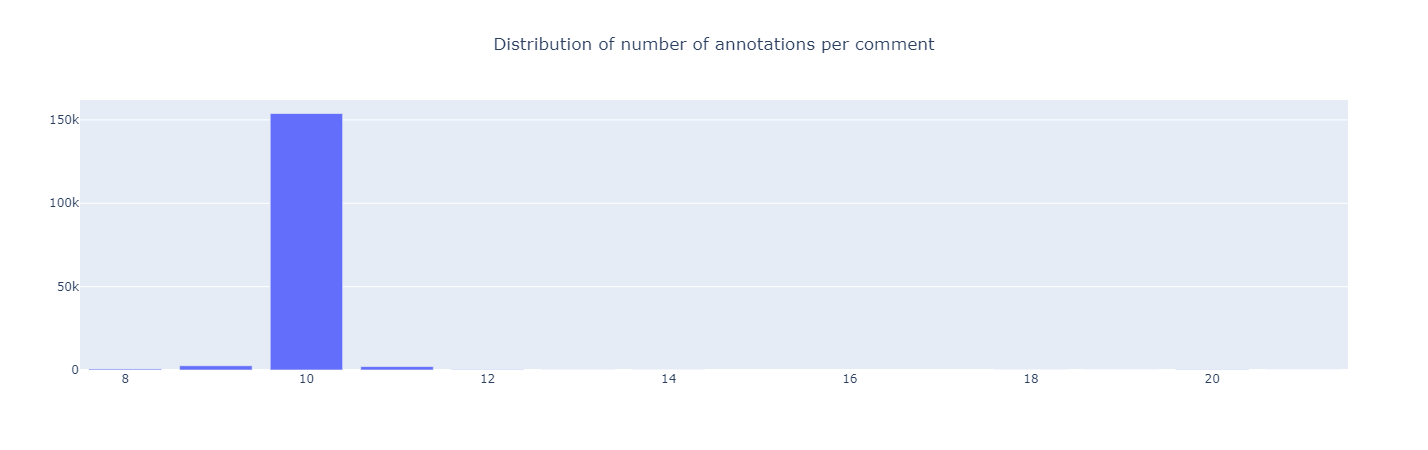

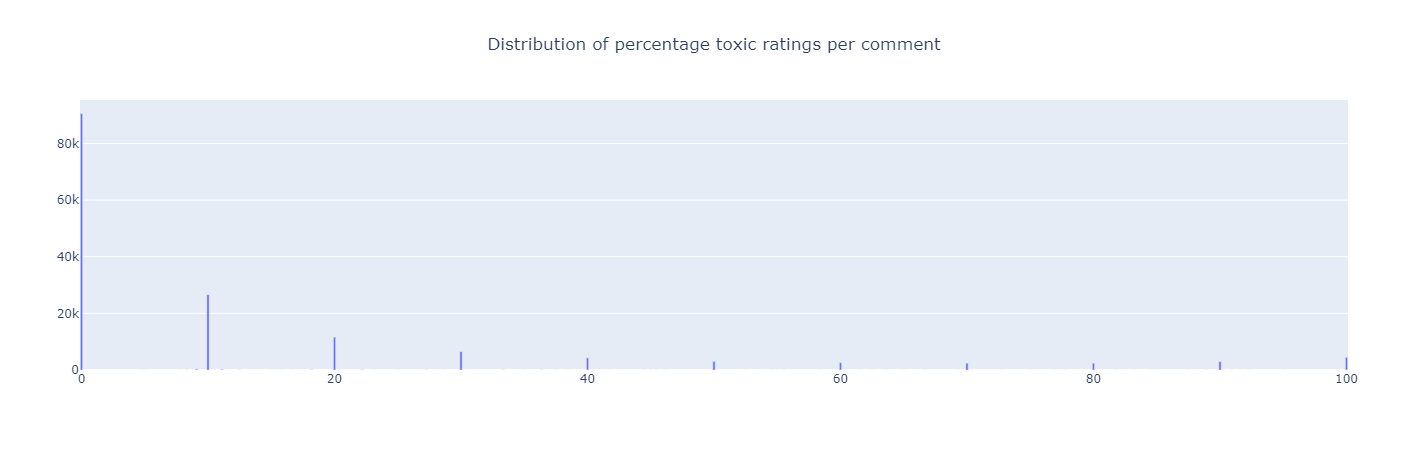

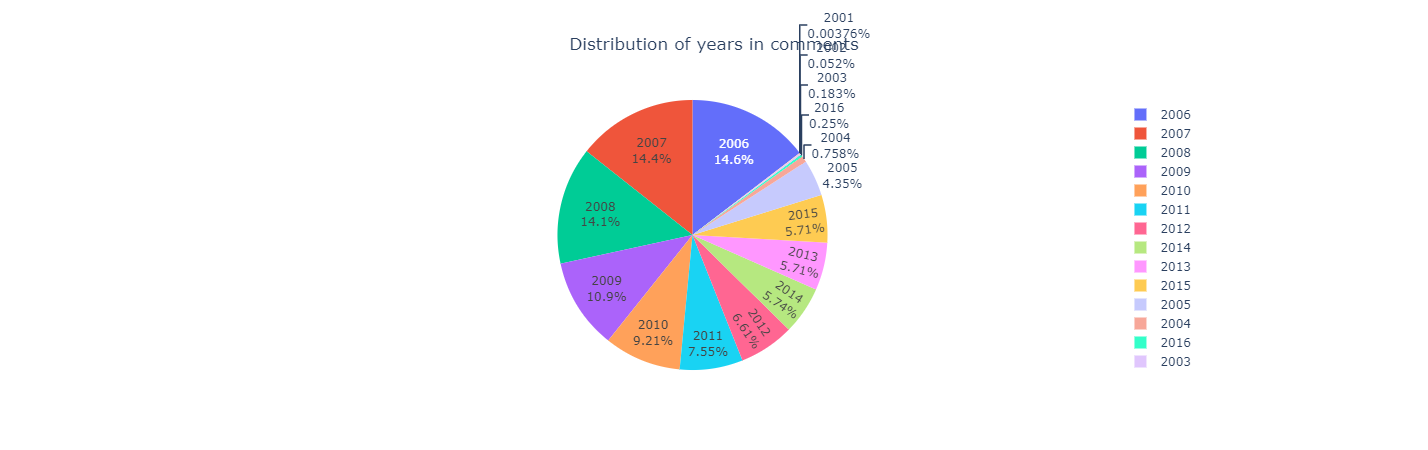

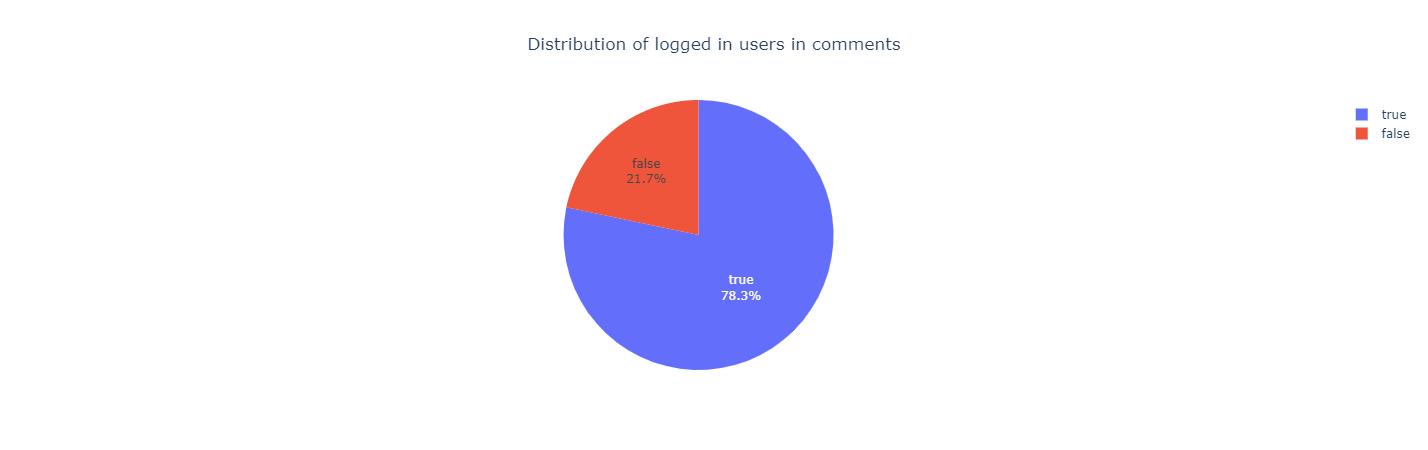

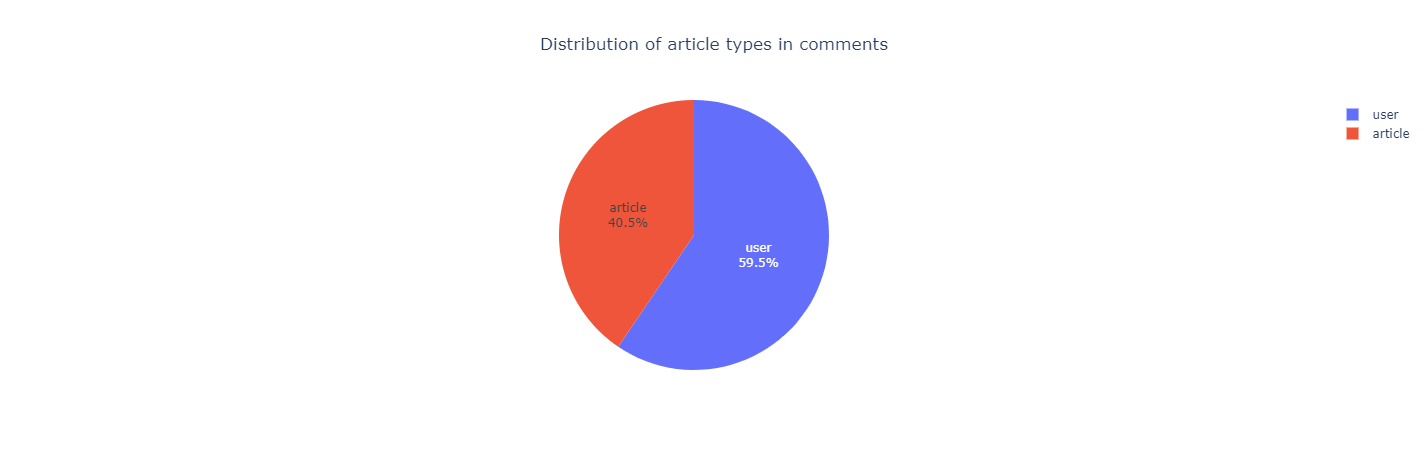

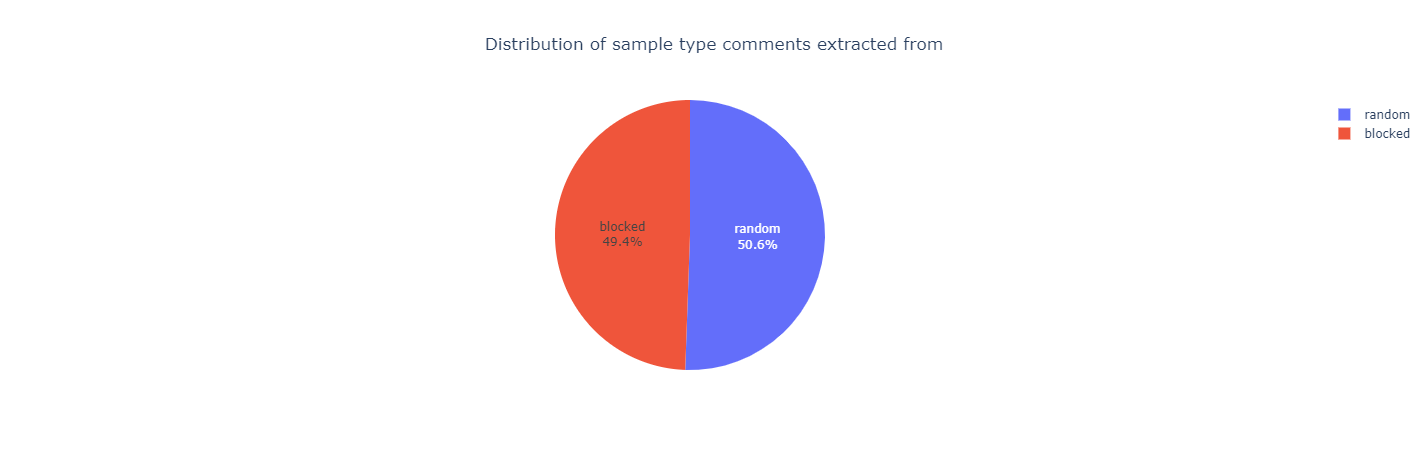

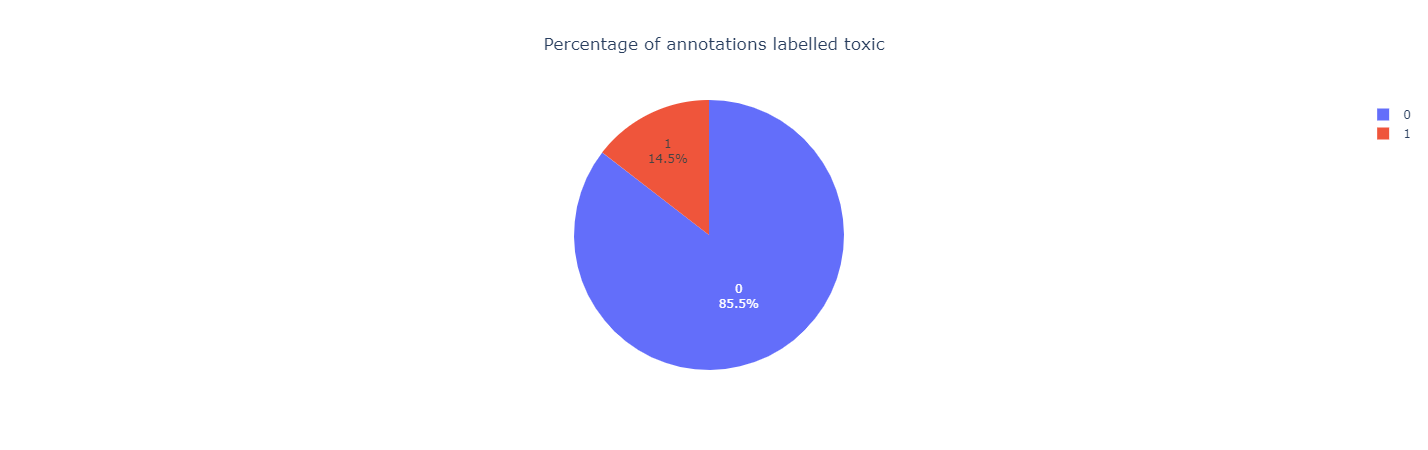

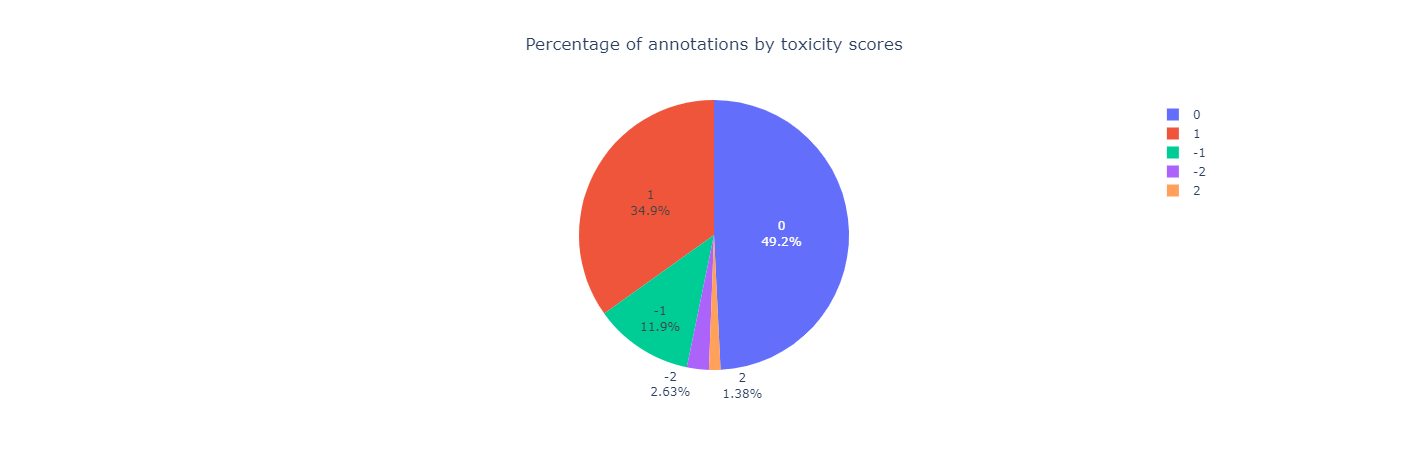

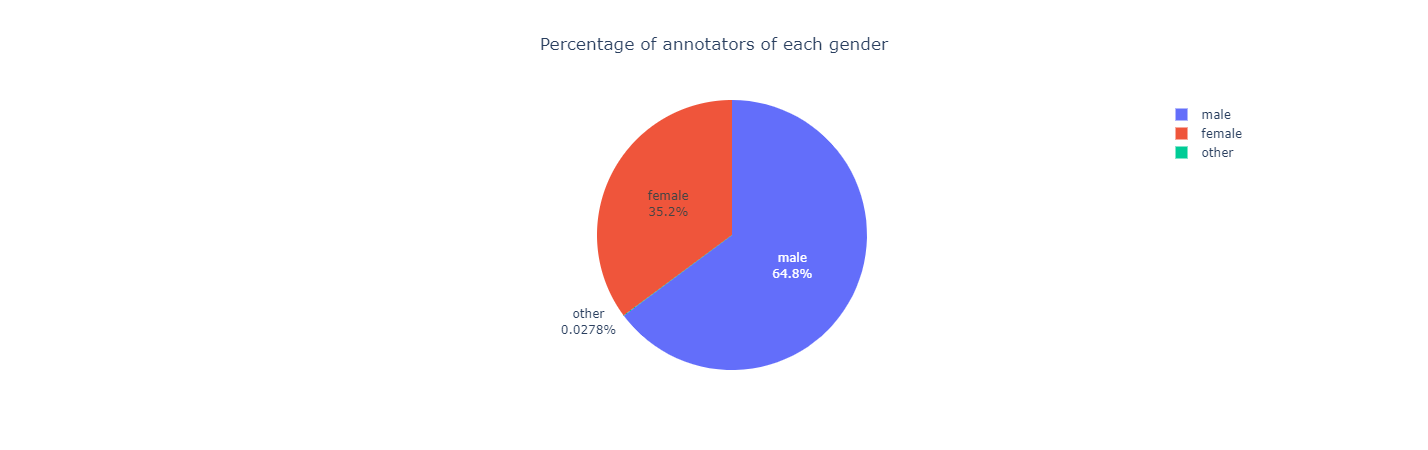

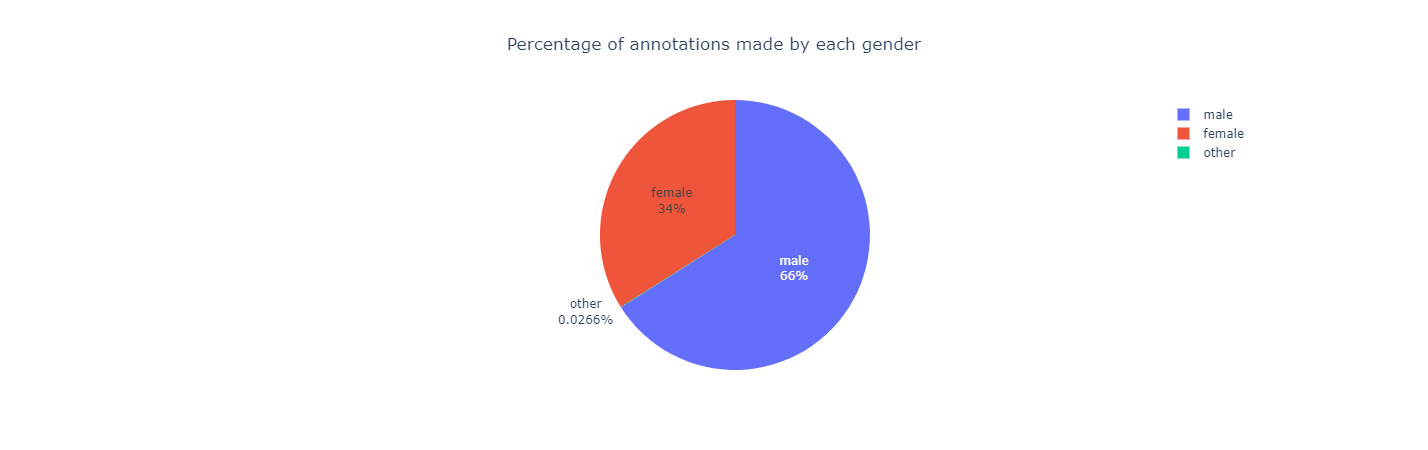

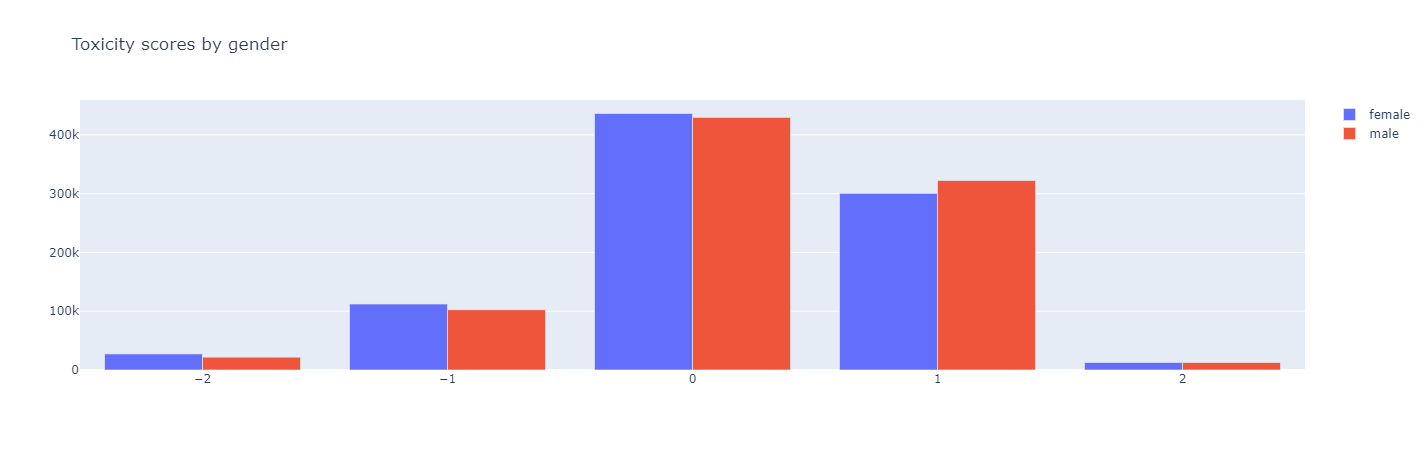


 mean annotations that are given toxic rating by gender
gender
female    0.157093
male      0.139886
other     0.164804
Name: toxicity, dtype: float64

 mean toxicity score given by gender
gender
female    0.178768
male      0.226826
other     0.553073
Name: toxicity_score, dtype: float64

 mean no. annotations for female annotator
362.11

 mean no. annotations for male annotator
382.14


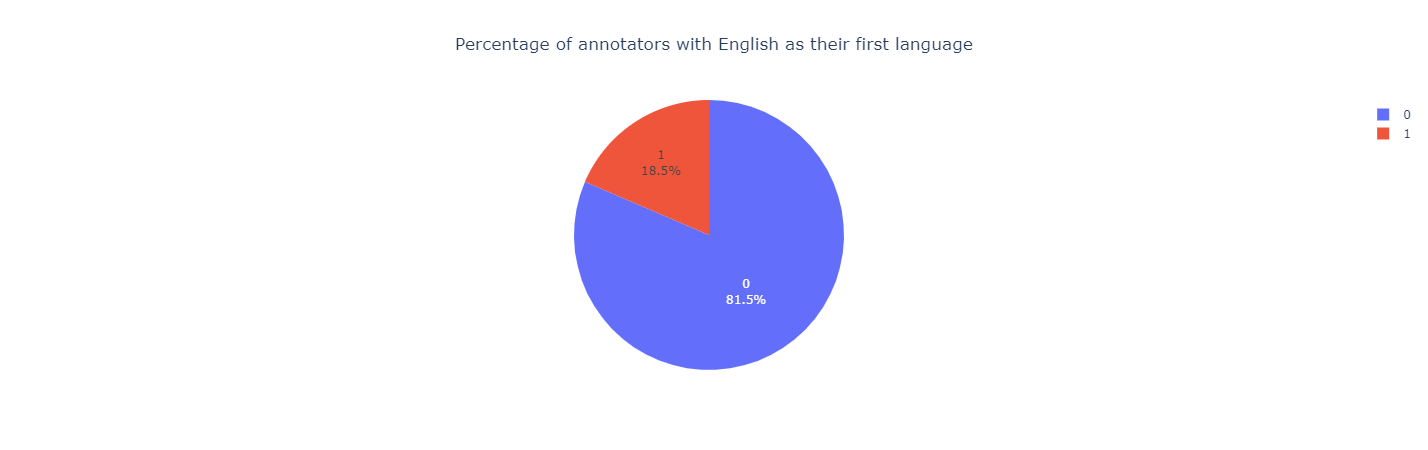

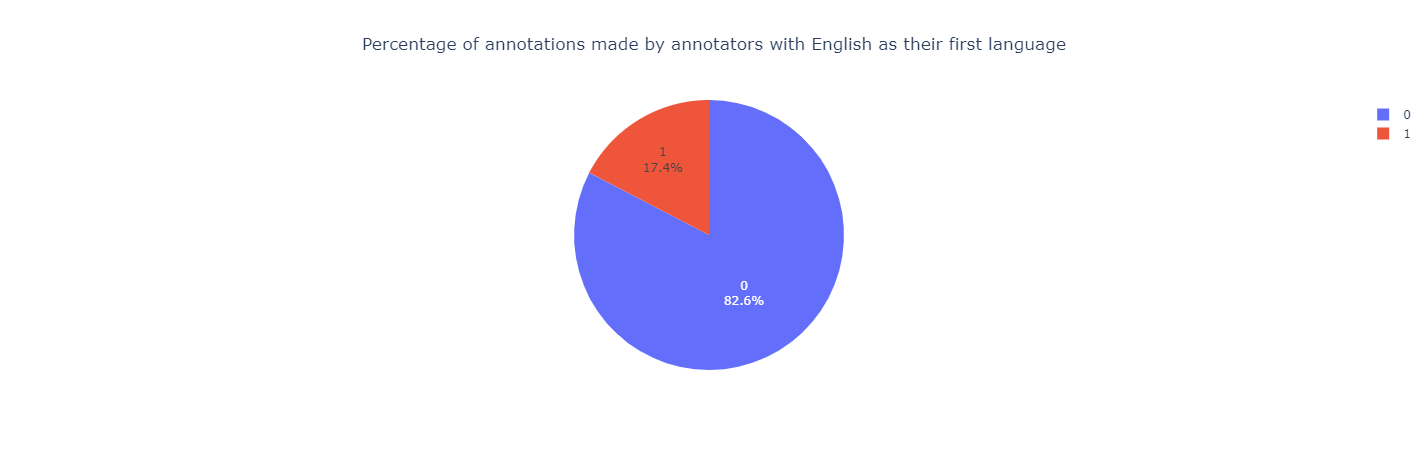

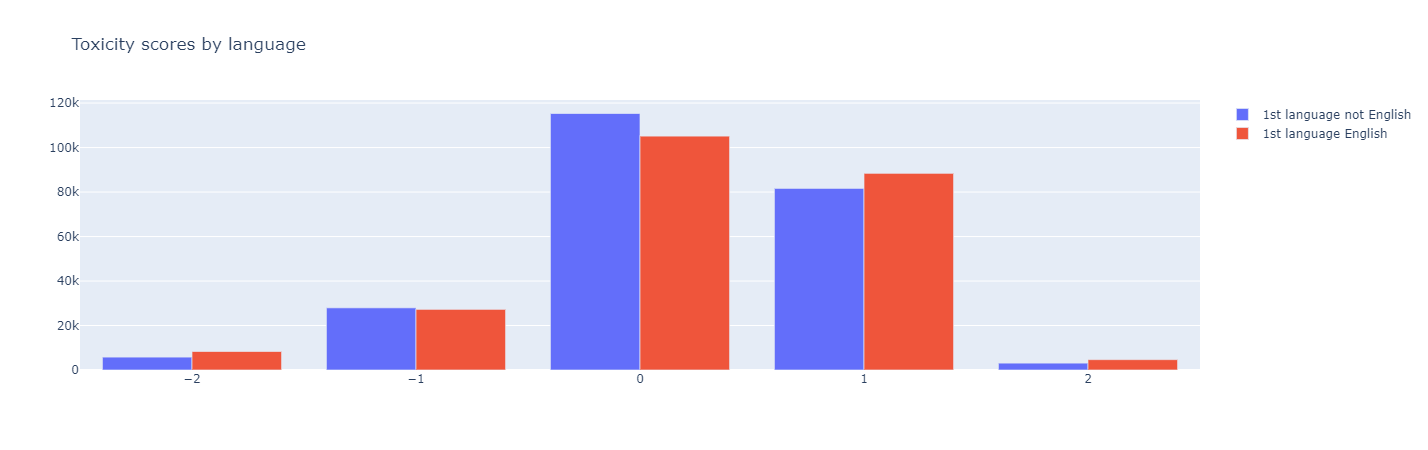


 mean annotations given toxic rating by language
english_first_language
0.0    0.144376
1.0    0.152207
Name: toxicity, dtype: float64

 mean toxicity score given by language
english_first_language
0.0    0.206479
1.0    0.230191
Name: toxicity_score, dtype: float64

 mean no. annotations for English 1st language annotator
351.04

 mean no. annotations for not English 1st language annotator
380.57


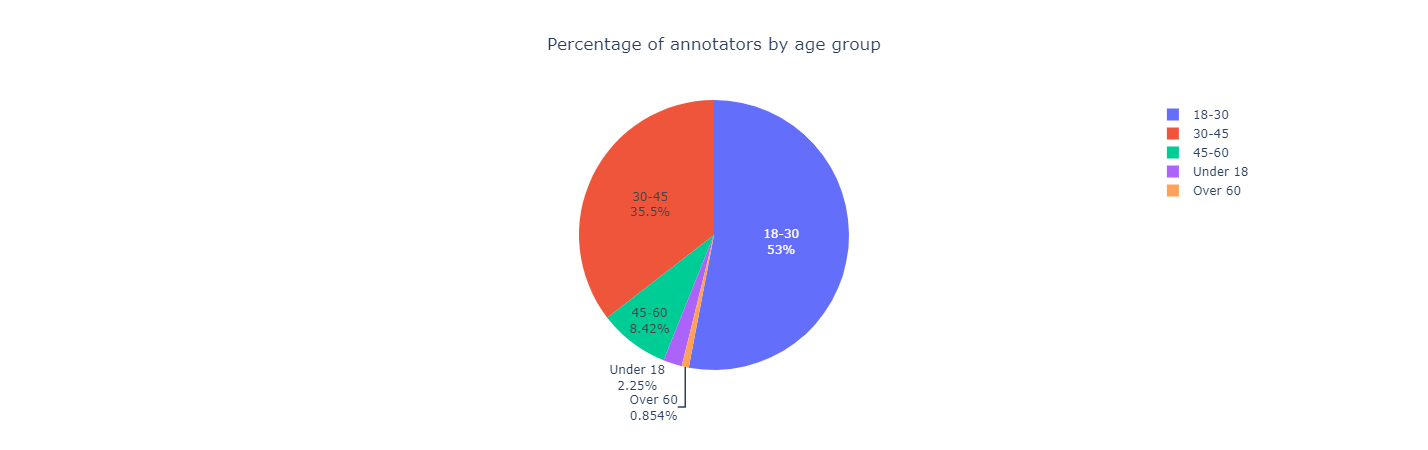

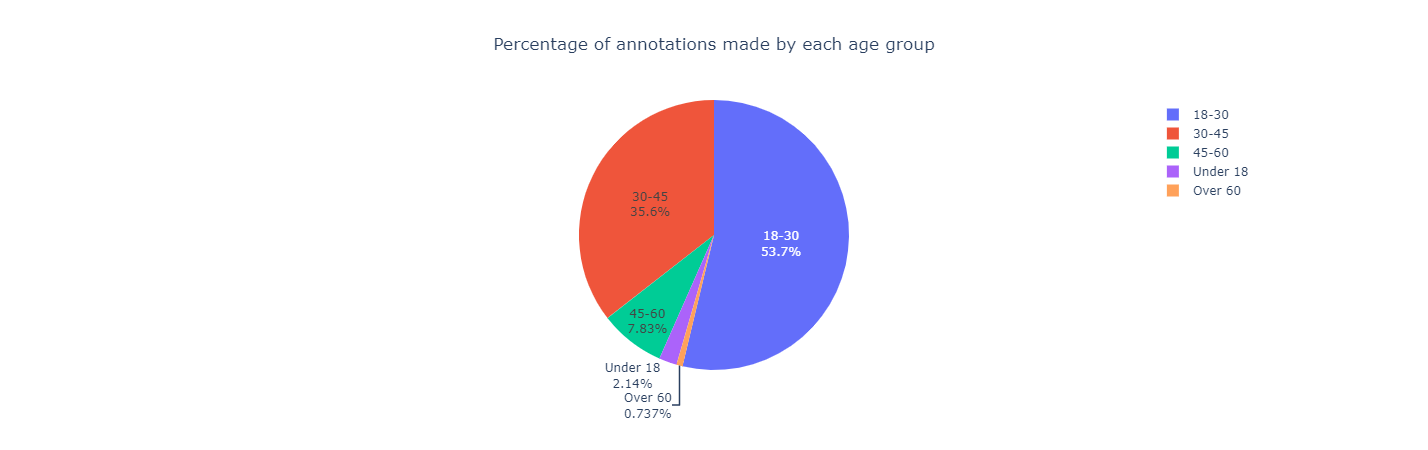

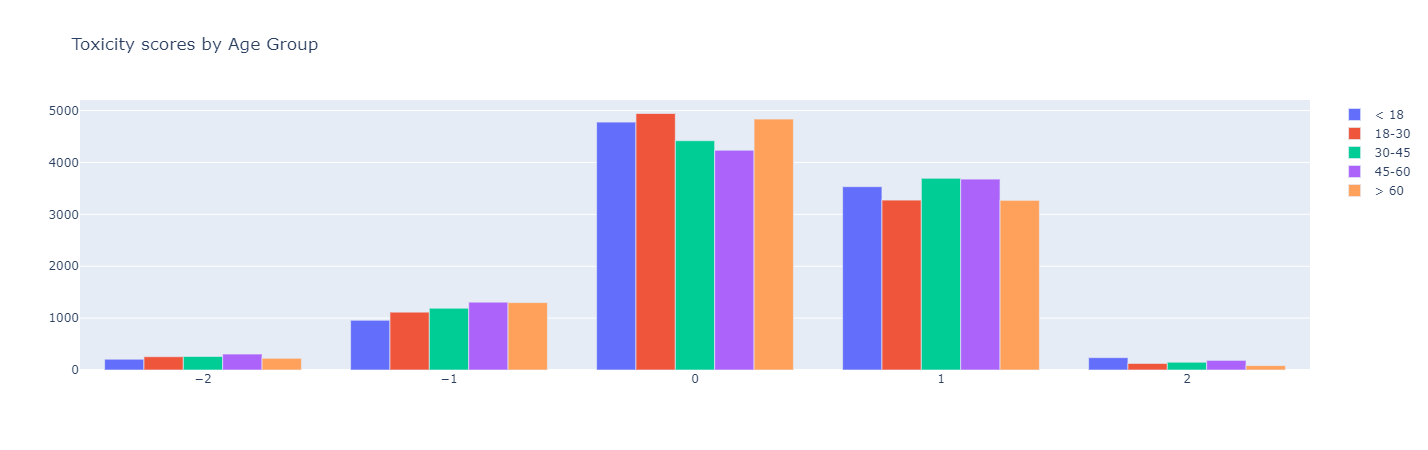


 mean annotations given toxic rating by age group
age_group
18-30       0.141173
30-45       0.149421
45-60       0.166251
Over 60     0.156941
Under 18    0.120135
Name: toxicity, dtype: float64

 mean toxicity score given by age group
age_group
18-30       0.195543
30-45       0.234938
45-60       0.219021
Over 60     0.173819
Under 18    0.271023
Name: toxicity_score, dtype: float64

 mean no. annotations for Under 18 annotator
356.46

 mean no. annotations for 18-30 annotator
380.33

 mean no. annotations for 30-45 annotator
375.67

 mean no. annotations for 45-60 annotator
348.40

 mean no. annotations for Over 60 annotator
323.90


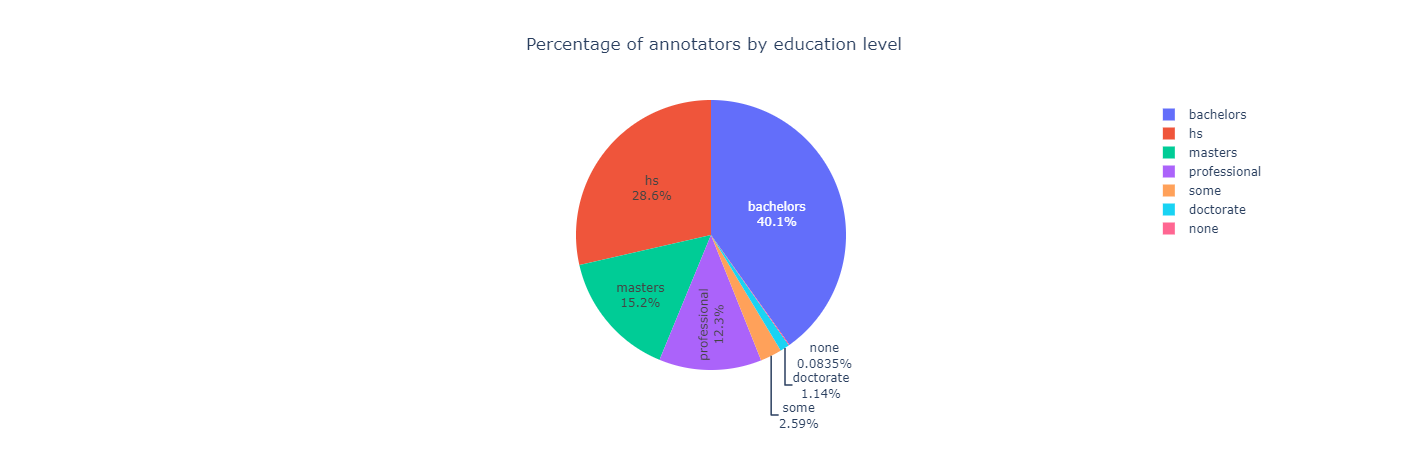

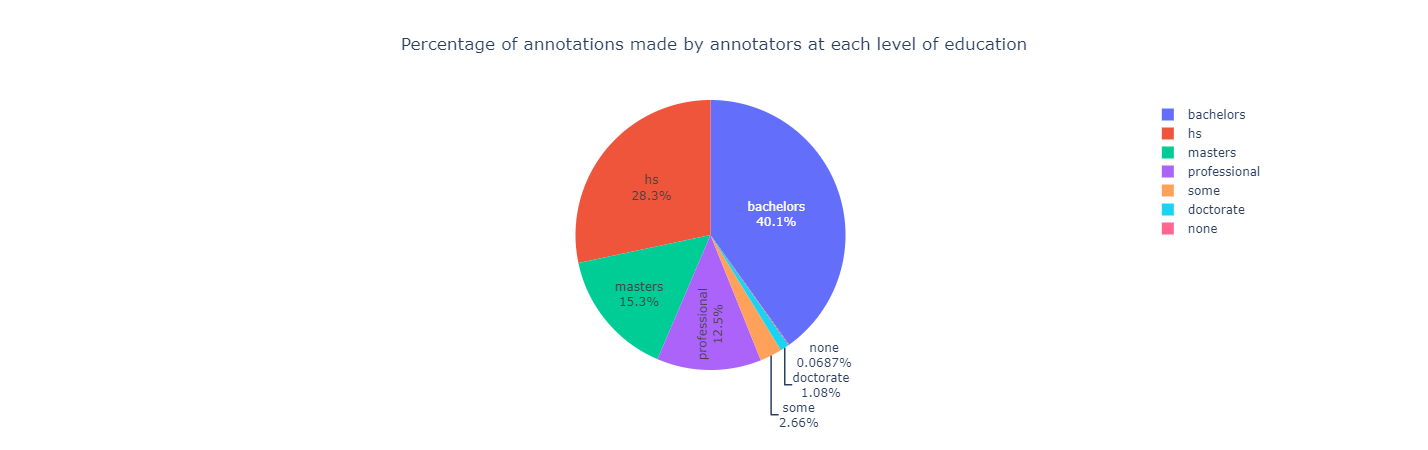

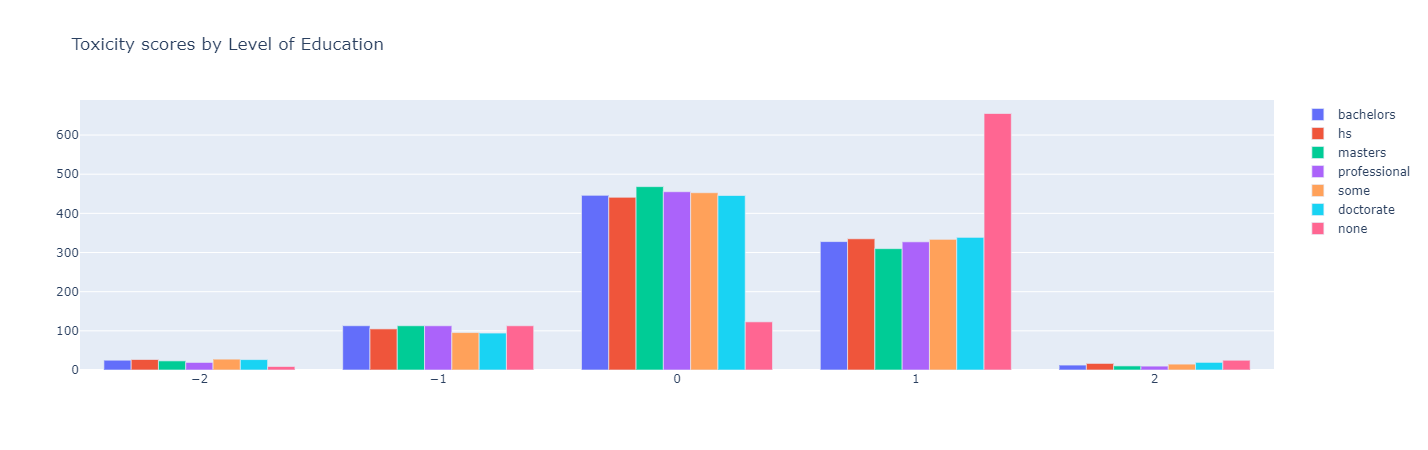


 mean annotations given toxic rating by level of education
education
bachelors       0.149419
doctorate       0.130837
hs              0.142544
masters         0.147407
none            0.131892
professional    0.143100
some            0.133419
Name: toxicity, dtype: float64

 mean toxicity score given by level of education
education
bachelors       0.205295
doctorate       0.248851
hs              0.227215
masters         0.185046
none            0.620541
professional    0.211426
some            0.229954
Name: toxicity_score, dtype: float64

 mean no. annotations for Bachelors education annotator
374.89

 mean no. annotations for High School education annotator
371.84

 mean no. annotations for Masters education annotator
376.24

 mean no. annotations for Professional education annotator
381.99

 mean no. annotations for some education annotator
385.40

 mean no. annotations for PhD education annotator
355.68

 mean no. annotations for no education annotator
308.33


In [115]:
# toxicity stats
print("Toxicity")
print("no. annotations:",len(toxicity))
print("no. comments:",toxicity['rev_id'].nunique())
print("no. annotators:",toxicity['worker_id'].nunique())
print("average no. annotations per annotator:","{:.2f}".format(len(toxicity)/toxicity['worker_id'].nunique()))
print("average no. annotations per comment:","{:.2f}".format(len(toxicity)/toxicity['rev_id'].nunique()))

s1 = toxicity.groupby('rev_id')['worker_id'].count()
df1 = pd.DataFrame({'rev_ids':s1.index, 'worker_counts':s1.values})
s = df1.worker_counts.value_counts()
df = pd.DataFrame({'worker_counts':s.index, 'counts':s.values})
fig = go.Figure([go.Bar(x=df.worker_counts, y=df.counts)])
fig.update_layout(title_text="Distribution of number of annotations per comment", title_x=0.5)
fig.show()

s1 = toxicity[toxicity.toxicity==1].groupby('rev_id')['toxicity'].count()
s2 = toxicity[toxicity.toxicity==0].groupby('rev_id')['toxicity'].count()
df1 = pd.DataFrame({'rev_ids':s1.index, 'one_counts':s1.values})
df2 = pd.DataFrame({'rev_ids':s2.index, 'zero_counts':s2.values})
df1 = df1.merge(df2, how ='outer', on="rev_ids")
df1['one_counts'] = df1['one_counts'].fillna(0)
df1['zero_counts'] = df1['zero_counts'].fillna(0)
df1['perc'] = df1['one_counts']/(df1['zero_counts']+df1['one_counts'])*100
s = df1.perc.value_counts()
df = pd.DataFrame({'percs':s.index, 'counts':s.values})
fig = go.Figure([go.Bar(x=df.percs, y=df.counts)])
fig.update_layout(title_text="Distribution of percentage toxic ratings per comment", title_x=0.5)
fig.show()

s = toxicity_comments.year.value_counts()
df = pd.DataFrame({'scores':s.index, 'counts':s.values})
fig = go.Figure(data=[go.Pie(labels=df.scores, values=df.counts,textinfo='label+percent')])
fig.update_layout(title_text="Distribution of years in comments", title_x=0.5)
fig.show()

s = toxicity_comments.logged_in.value_counts()
df = pd.DataFrame({'scores':s.index, 'counts':s.values})
fig = go.Figure(data=[go.Pie(labels=df.scores, values=df.counts,textinfo='label+percent')])
fig.update_layout(title_text="Distribution of logged in users in comments", title_x=0.5)
fig.show()

s = toxicity_comments.ns.value_counts()
df = pd.DataFrame({'scores':s.index, 'counts':s.values})
fig = go.Figure(data=[go.Pie(labels=df.scores, values=df.counts,textinfo='label+percent')])
fig.update_layout(title_text="Distribution of article types in comments", title_x=0.5)
fig.show()

toxicity_comments = toxicity_comments.rename(columns={"sample": "sample_type"})
s = toxicity_comments.sample_type.value_counts()
df = pd.DataFrame({'scores':s.index, 'counts':s.values})
fig = go.Figure(data=[go.Pie(labels=df.scores, values=df.counts,textinfo='label+percent')])
fig.update_layout(title_text="Distribution of sample type comments extracted from", title_x=0.5)
fig.show()

s = toxicity.toxicity.value_counts()
df = pd.DataFrame({'scores':s.index, 'counts':s.values})
fig = go.Figure(data=[go.Pie(labels=df.scores, values=df.counts,textinfo='label+percent')])
fig.update_layout(title_text="Percentage of annotations labelled toxic", title_x=0.5)
fig.show()

s = toxicity.toxicity_score.value_counts()
df = pd.DataFrame({'scores':s.index, 'counts':s.values})
fig = go.Figure(data=[go.Pie(labels=df.scores, values=df.counts,textinfo='label+percent')])
fig.update_layout(title_text="Percentage of annotations by toxicity scores", title_x=0.5)
fig.show()

s = toxicity_demographics.gender.value_counts()
df = pd.DataFrame({'scores':s.index, 'counts':s.values})
fig = go.Figure(data=[go.Pie(labels=df.scores, values=df.counts,textinfo='label+percent')])
fig.update_layout(title_text="Percentage of annotators of each gender", title_x=0.5)
fig.show()

s = toxicity.gender.value_counts()
df = pd.DataFrame({'scores':s.index, 'counts':s.values})
fig = go.Figure(data=[go.Pie(labels=df.scores, values=df.counts,textinfo='label+percent')])
fig.update_layout(title_text="Percentage of annotations made by each gender", title_x=0.5)
fig.show()

s1 = toxicity[toxicity.gender=='female'].toxicity_score.value_counts()
s2 = toxicity[toxicity.gender=='male'].toxicity_score.value_counts()
df1 = pd.DataFrame({'scores':s1.index, 'counts':s1.values})
df2 = pd.DataFrame({'scores':s2.index, 'counts':s2.values})
df1['counts'] = df1['counts'].div(sum(df1.counts)/sum(df2.counts))
fig = go.Figure(data=[
    go.Bar(name='female', x=df1.scores, y=df1.counts),
    go.Bar(name='male', x=df2.scores, y=df2.counts)
])
fig.update_layout(barmode='group',title="Toxicity scores by gender")
fig.show()

print("\n mean annotations that are given toxic rating by gender")
print(toxicity.groupby('gender')['toxicity'].mean())

print("\n mean toxicity score given by gender")
print(toxicity.groupby('gender')['toxicity_score'].mean())

print("\n mean no. annotations for female annotator")
print("{:.2f}".format(toxicity[toxicity.gender == "female"].groupby('worker_id')['rev_id'].count().mean()))

print("\n mean no. annotations for male annotator")
print("{:.2f}".format(toxicity[toxicity.gender == "male"].groupby('worker_id')['rev_id'].count().mean()))

s = toxicity_demographics.english_first_language.value_counts()
df = pd.DataFrame({'scores':s.index, 'counts':s.values})
fig = go.Figure(data=[go.Pie(labels=df.scores, values=df.counts,textinfo='label+percent')])
fig.update_layout(title_text="Percentage of annotators with English as their first language", title_x=0.5)
fig.show()

s = toxicity.english_first_language.value_counts()
df = pd.DataFrame({'scores':s.index, 'counts':s.values})
fig = go.Figure(data=[go.Pie(labels=df.scores, values=df.counts,textinfo='label+percent')])
fig.update_layout(title_text="Percentage of annotations made by annotators with English as their first language", title_x=0.5)
fig.show()

s1 = toxicity[toxicity.english_first_language==0].toxicity_score.value_counts()
s2 = toxicity[toxicity.english_first_language==1].toxicity_score.value_counts()
df1 = pd.DataFrame({'scores':s1.index, 'counts':s1.values})
df2 = pd.DataFrame({'scores':s2.index, 'counts':s2.values})
df1['counts'] = df1['counts'].div(sum(df1.counts)/sum(df2.counts))
fig = go.Figure(data=[
    go.Bar(name='1st language not English', x=df1.scores, y=df1.counts),
    go.Bar(name='1st language English', x=df2.scores, y=df2.counts)
])
fig.update_layout(barmode='group',title="Toxicity scores by language")
fig.show()

print("\n mean annotations given toxic rating by language")
print(toxicity.groupby('english_first_language')['toxicity'].mean())

print("\n mean toxicity score given by language")
print(toxicity.groupby('english_first_language')['toxicity_score'].mean())

print("\n mean no. annotations for English 1st language annotator")
print("{:.2f}".format(toxicity[toxicity.english_first_language==1].groupby('worker_id')['rev_id'].count().mean()))

print("\n mean no. annotations for not English 1st language annotator")
print("{:.2f}".format(toxicity[toxicity.english_first_language==0].groupby('worker_id')['rev_id'].count().mean()))

s = toxicity_demographics.age_group.value_counts()
df = pd.DataFrame({'scores':s.index, 'counts':s.values})
fig = go.Figure(data=[go.Pie(labels=df.scores, values=df.counts,textinfo='label+percent')])
fig.update_layout(title_text="Percentage of annotators by age group", title_x=0.5)
fig.show()

s = toxicity.age_group.value_counts()
df = pd.DataFrame({'scores':s.index, 'counts':s.values})
fig = go.Figure(data=[go.Pie(labels=df.scores, values=df.counts,textinfo='label+percent')])
fig.update_layout(title_text="Percentage of annotations made by each age group", title_x=0.5)
fig.show()

s1 = toxicity[toxicity.age_group=="Under 18"].toxicity_score.value_counts()
s2 = toxicity[toxicity.age_group=="18-30"].toxicity_score.value_counts()
s3 = toxicity[toxicity.age_group=="30-45"].toxicity_score.value_counts()
s4 = toxicity[toxicity.age_group=="45-60"].toxicity_score.value_counts()
s5 = toxicity[toxicity.age_group=="Over 60"].toxicity_score.value_counts()
df1 = pd.DataFrame({'scores':s1.index, 'counts':s1.values})
df2 = pd.DataFrame({'scores':s2.index, 'counts':s2.values})
df3 = pd.DataFrame({'scores':s3.index, 'counts':s3.values})
df4 = pd.DataFrame({'scores':s4.index, 'counts':s4.values})
df5 = pd.DataFrame({'scores':s5.index, 'counts':s5.values})
df1['counts'] = df1['counts'].div(sum(df1.counts)/sum(df5.counts))
df2['counts'] = df2['counts'].div(sum(df2.counts)/sum(df5.counts))
df3['counts'] = df3['counts'].div(sum(df3.counts)/sum(df5.counts))
df4['counts'] = df4['counts'].div(sum(df4.counts)/sum(df5.counts))
fig = go.Figure(data=[
    go.Bar(name='< 18', x=df1.scores, y=df1.counts),
    go.Bar(name='18-30', x=df2.scores, y=df2.counts),
    go.Bar(name='30-45', x=df3.scores, y=df3.counts),
    go.Bar(name='45-60', x=df4.scores, y=df4.counts),
    go.Bar(name='> 60', x=df5.scores, y=df5.counts)
])
fig.update_layout(barmode='group',title="Toxicity scores by Age Group")
fig.show()

print("\n mean annotations given toxic rating by age group")
print(toxicity.groupby('age_group')['toxicity'].mean())

print("\n mean toxicity score given by age group")
print(toxicity.groupby('age_group')['toxicity_score'].mean())

print("\n mean no. annotations for Under 18 annotator")
print("{:.2f}".format(toxicity[toxicity.age_group == "Under 18"].groupby('worker_id')['rev_id'].count().mean()))
print("\n mean no. annotations for 18-30 annotator")
print("{:.2f}".format(toxicity[toxicity.age_group == "18-30"].groupby('worker_id')['rev_id'].count().mean()))
print("\n mean no. annotations for 30-45 annotator")
print("{:.2f}".format(toxicity[toxicity.age_group == "30-45"].groupby('worker_id')['rev_id'].count().mean()))
print("\n mean no. annotations for 45-60 annotator")
print("{:.2f}".format(toxicity[toxicity.age_group == "45-60"].groupby('worker_id')['rev_id'].count().mean()))
print("\n mean no. annotations for Over 60 annotator")
print("{:.2f}".format(toxicity[toxicity.age_group == "Over 60"].groupby('worker_id')['rev_id'].count().mean()))

s = toxicity_demographics.education.value_counts()
df = pd.DataFrame({'scores':s.index, 'counts':s.values})
fig = go.Figure(data=[go.Pie(labels=df.scores, values=df.counts,textinfo='label+percent')])
fig.update_layout(title_text="Percentage of annotators by education level", title_x=0.5)
fig.show()

s = toxicity.education.value_counts()
df = pd.DataFrame({'scores':s.index, 'counts':s.values})
fig = go.Figure(data=[go.Pie(labels=df.scores, values=df.counts,textinfo='label+percent')])
fig.update_layout(title_text="Percentage of annotations made by annotators at each level of education", title_x=0.5)
fig.show()

s1 = toxicity[toxicity.education=="bachelors"].toxicity_score.value_counts()
s2 = toxicity[toxicity.education=="hs"].toxicity_score.value_counts()
s3 = toxicity[toxicity.education=="masters"].toxicity_score.value_counts()
s4 = toxicity[toxicity.education=="professional"].toxicity_score.value_counts()
s5 = toxicity[toxicity.education=="some"].toxicity_score.value_counts()
s6 = toxicity[toxicity.education=="doctorate"].toxicity_score.value_counts()
s7 = toxicity[toxicity.education=="none"].toxicity_score.value_counts()
df1 = pd.DataFrame({'scores':s1.index, 'counts':s1.values})
df2 = pd.DataFrame({'scores':s2.index, 'counts':s2.values})
df3 = pd.DataFrame({'scores':s3.index, 'counts':s3.values})
df4 = pd.DataFrame({'scores':s4.index, 'counts':s4.values})
df5 = pd.DataFrame({'scores':s5.index, 'counts':s5.values})
df6 = pd.DataFrame({'scores':s6.index, 'counts':s6.values})
df7 = pd.DataFrame({'scores':s7.index, 'counts':s7.values})
df1['counts'] = df1['counts'].div(sum(df1.counts)/sum(df7.counts))
df2['counts'] = df2['counts'].div(sum(df2.counts)/sum(df7.counts))
df3['counts'] = df3['counts'].div(sum(df3.counts)/sum(df7.counts))
df4['counts'] = df4['counts'].div(sum(df4.counts)/sum(df7.counts))
df5['counts'] = df5['counts'].div(sum(df5.counts)/sum(df7.counts))
df6['counts'] = df6['counts'].div(sum(df6.counts)/sum(df7.counts))
fig = go.Figure(data=[
    go.Bar(name='bachelors', x=df1.scores, y=df1.counts),
    go.Bar(name='hs', x=df2.scores, y=df2.counts),
    go.Bar(name='masters', x=df3.scores, y=df3.counts),
    go.Bar(name='professional', x=df4.scores, y=df4.counts),
    go.Bar(name='some', x=df5.scores, y=df5.counts),
    go.Bar(name='doctorate', x=df6.scores, y=df6.counts),
    go.Bar(name='none', x=df7.scores, y=df7.counts)
])
fig.update_layout(barmode='group',title="Toxicity scores by Level of Education")
fig.show()

print("\n mean annotations given toxic rating by level of education")
print(toxicity.groupby('education')['toxicity'].mean())

print("\n mean toxicity score given by level of education")
print(toxicity.groupby('education')['toxicity_score'].mean())

print("\n mean no. annotations for Bachelors education annotator")
print("{:.2f}".format(toxicity[toxicity.education=="bachelors"].groupby('worker_id')['rev_id'].count().mean()))
print("\n mean no. annotations for High School education annotator")
print("{:.2f}".format(toxicity[toxicity.education=="hs"].groupby('worker_id')['rev_id'].count().mean()))
print("\n mean no. annotations for Masters education annotator")
print("{:.2f}".format(toxicity[toxicity.education=="masters"].groupby('worker_id')['rev_id'].count().mean()))
print("\n mean no. annotations for Professional education annotator")
print("{:.2f}".format(toxicity[toxicity.education=="professional"].groupby('worker_id')['rev_id'].count().mean()))
print("\n mean no. annotations for some education annotator")
print("{:.2f}".format(toxicity[toxicity.education=="some"].groupby('worker_id')['rev_id'].count().mean()))
print("\n mean no. annotations for PhD education annotator")
print("{:.2f}".format(toxicity[toxicity.education=="doctorate"].groupby('worker_id')['rev_id'].count().mean()))
print("\n mean no. annotations for no education annotator")
print("{:.2f}".format(toxicity[toxicity.education=="none"].groupby('worker_id')['rev_id'].count().mean()))
